<a href="https://colab.research.google.com/github/Fuad-Khan/Fuad-Khan-Riligious_comments_data_preprocessing/blob/main/Religious_comments_2class_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel file
# Load the Excel file
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Religious_Comments_v4.xlsx"
df = pd.read_excel(file_path)

# Define function with expanded Bangla religious and harassment keywords
def label_comment(comment):
    text = str(comment).lower()

    religious_keywords = [
    # Islamic Keywords
    'আল্লাহ', 'আহাল্লার', 'আল্লা', 'মোহাম্মদ', 'ইসলাম', 'ধর্ম', 'রোজা', 'হজ', 'কোরআন', 'নামাজ', 'মসজিদ', 'দোয়া', 'ফজর',
    'জুম্মা', 'ঈদ', 'ইমান', 'মুসলমান', 'আযান', 'ইমাম', 'মাদ্রাসা', 'সালাত', 'যাকাত', 'সাওম', 'শাহাদাহ',
    'আখিরাত', 'জান্নাত', 'জাহান্নাম', 'ফাতেহা', 'সূরা', 'আয়াত', 'হাদিস', 'সুন্নাহ', 'তাওহিদ', 'শিরক',
    'মিলাদ', 'বিসমিল্লাহ', 'ইনশাআল্লাহ', 'মাশাআল্লাহ', 'আস্তাগফিরুল্লাহ', 'সুবহানাল্লাহ', 'আমিন',
    'রমজান', 'কিবলা', 'তাকবীর', 'তাহাজ্জুদ', 'ওযু', 'গোসল', 'খতম', 'দরুদ', 'কিয়ামত', 'মিকাত',
    'মুআজ্জিন', 'নফল', 'কাফের', 'মুনাফিক', 'তাওবা', 'জিজিয়া', 'খুতবা', 'ইকামত', "নাস্তিক",
    'নবী', 'নোবী', 'নোবীর', 'মোল্লা', 'মোল্লার', 'মহাম্মদ', 'মুহাম্মদ', 'মাদ্রসা', 'মাদরাসা', 'ইজরাইল',
    "জিবরাইল", "জিব্রাইল", "আজরাইল", "মিকাইল", "ইসরাফিল",
    "মুহাম্মদ", "ইব্রাহিম", "মূসা", "ঈসা", "নুহ", "ইউনুস",
    "দাউদ", "সুলাইমান", "আইউব", "হারুন", "ইলিয়াস", "লুত",
    "উম্মাহ", "উম্মত", "হিজাব", "বুরকা", "তসবিহ", 'আমীন',

    # Hindu Keywords
    'হিন্দু', 'রাম', 'শিব', 'কৃষ্ণ', 'পূজা', 'উপাসনা', 'গীতা', 'ভগবান', 'তীর্থ', 'আত্মা', 'দুর্গা',
    'কালী', 'লক্ষ্মী', 'সরস্বতী', 'হনুমান', 'গণেশ', 'যজ্ঞ', 'মন্ত্র', 'প্রার্থনা', 'অর্চনা', 'দেবতা',
    'অসুর', 'ব্রহ্মা', 'বিষ্ণু', 'মহাদেব', 'অভিষেক', 'পূজারী', 'প্রসাদ', 'মন্দির', 'জপ', 'অগ্নি',
    'অহিংসা', 'অবতার', 'আরতি', 'ঐশ্বর্য', 'কৈলাশ', 'চণ্ডী', 'জয়ন্তী', 'তিলক', 'দীক্ষা', 'ধুনুচি',
    'নবরাত্রি', 'পঞ্চদেবতা', 'ব্রত', 'মহিষাসুর', 'যোগিনী', 'শক্তি', 'মালায়ুন', 'মালায়ন', 'ঠাকুর',
    "ব্রহ্মা", "বিষ্ণু", "মহেশ", "ইন্দ্র", "অগ্নি", "বরুণ",
    "কুবের", "যম", "হনুমান", "রাম", "লক্ষ্মণ", "কৃষ্ণ", "বালরাম",
    "ভগবান", "ভগবতী", "দুর্গা", "কালি", "সরস্বতী", "লক্ষ্মী", "পার্থ",
    "সীতা", "রাধা", "শক্তি", "গণেশ", "কার্তিক", "নারায়ণ", "রামচন্দ্র",
    "ভগবান", "অবতার", "অবতারপুরুষ", "গোবিন্দ", "নন্দলাল", "নরসিংহ",
    "ত্রিলোকনাথ", "জগন্নাথ", "দেবতা", "দেবী", 'দেবি', 'পুজো',

    # Christian Keywords
    'যীশু', 'খ্রিস্টান', 'বাইবেল', 'গির্জা', 'পাদ্রি', 'ক্রুশ', 'প্রভু', 'পাপ', 'স্বর্গরাজ্য',
    'প্রেরিত', 'জন্মদিন', 'ইস্টার', 'খ্রীষ্ট', 'পবিত্র আত্মা', 'ধর্মপ্রচারক', 'যাজক', 'অনুতাপ', 'দানিয়েল',
    'দশ আজ্ঞা', 'নূহ', 'যোহন', 'প্রলয়', 'যিশাইয়', 'গসপেল', 'খ্রিস্টমাস', "ঈসা", "যিশু", "যীশু", "মেরি", "পিতাপবিত্র", "গড", "ক্রিস্ট", "খ্রিস্ট", "ম্যাথিউ",
    "লুক", "পল", "মোজেস", "ডেভিড", "সামুয়েল", "ক্রস", "বাইবেল", "ঈশ্বর",

    # Buddhist Keywords
    'বুদ্ধ', 'বৌদ্ধ', 'কর্ম', 'নির্বাণ', 'পালি', 'সূত্র', 'ভিক্ষু', 'ধ্যান', 'অষ্টাঙ্গিক মার্গ', 'দুঃখ',
    'ত্রিপিটক', 'শীল', 'প্রজ্ঞা', 'কারুণ্য', 'বোধি', 'সংঘ', 'তান্ত্রিক', 'মৈত্রী', 'চক্র', 'জেন',
    'লামা', 'মনীষা', 'শূন্যতা', 'স্তূপ', 'ধর্মচক্র', "গৌতম বুদ্ধ", "বুদ্ধ", "শাক্যমুনি", "অমিতাভ", "অভলোকিতেশ্বর", "মৈত্রেয়", "ধর্ম", "সংঘ",

    # General Spiritual/Religious
    'ঈশ্বর', 'নরক', 'স্বর্গ', 'পবিত্র', 'ধার্মিক', 'অধর্ম', 'অলৌকিক', 'অধ্যাত্ম', 'আশীর্বাদ', 'অভিশাপ',
    'মৃত্যুঞ্জয়', 'তীর্থযাত্রা', 'পুণ্য', 'অদৃশ্য', 'আত্মসমর্পণ', 'জাগরণ', 'মহিমা', 'মোল্লা', 'গো মুত্র', '৭৮৬' 'নুনু',
    'সৃষ্টিকর্তা', 'পশুহত্যা', 'জঙ্গি', 'মুনাফেক', 'সইতান', 'উট', 'মালাউন'
    ]

    harassment_keywords = [
    # Personal attacks
    'শুয়োর', 'কুকুর', 'গাধা', 'জানোয়ার', 'পশু', 'গরু', 'ছাগল', 'পাঁঠা', 'গাধার', 'খানকি',
    'খানকির ছেলে', 'হারামি', 'হারামজাদা', 'জারজ', 'ব্যভিচারী', 'বেইমান', 'কামচোর', 'চোদা',
    'চুদা', "চুদি", 'চুদেছিল', 'চুদেছি', 'খানকির পোলা', 'ধোন', 'বাল', 'লান্ড', 'ভোঁদা', 'পোদ', 'পোঁদ', 'গুদ', 'হোগা', 'চুত', 'মাগি', 'মাগির',
    'বেশ্যা', 'রেন্ডি', 'দালাল', 'হিজড়া', 'নপুংসক', 'হিজড়া', 'কুত্তা', 'কুত্তাচোদা', 'শালা', 'ধনের', 'ধন', 'মাদারচোদ', 'বিচিকে',

    # Religious/caste slurs
    'ম্লেচ্ছ', 'যবন', 'কাফের', 'নাস্তিক', 'ধর্মহীন', 'অধার্মিক', 'অবিশ্বাসী', 'মুশরিক', 'নীচ',
    'নিচু', 'অচ্ছুত', 'চণ্ডাল', 'ডোম', 'হরিজন', 'মালাউন', 'মালুন', 'কাঙ্গাল',

    # Verbal abuse/actions
    'মারব', 'মেরে', 'খুন', 'কাটব', 'কেটে', 'জবাই', 'ধর্ষণ', 'গালিগালাজ',
    'অপমান', 'অবমাননা', 'অশ্লীল', 'নোংরা', 'ঘৃণা', 'বিদ্বেষ', 'শত্রু', 'দুশমন', 'মিথ্যাবাদী',
    'প্রবঞ্চক', 'ধোকাবাজ', 'বোকা', 'মূর্খ', 'অশিক্ষিত', 'গণ্ডমূর্খ', 'জাহিল', 'নষ্ট', 'ভণ্ড',
    'পাষণ্ড', 'পিশাচ', 'নরপিশাচ', 'অসভ্য', 'বর্বর', 'জংলী', 'পাগল', 'উন্মাদ', 'বিকৃত',
    'কুৎসিত', 'জঘন্য', 'ঘৃণিত', 'চোর', 'ডাকাত', 'লম্পট', 'বদমাশ', 'শয়তান', 'ইবলিশ', 'কুফরি',

    # Religion-specific abuse
    'অবিশ্বাসী', 'ধর্মবিদ্বেষী', 'অমুসলিম', 'ধর্মান্ধ', 'ধর্ম নিয়ে বাজে কথা', 'ধর্মীয় উগ্রতা',
    'অশ্রদ্ধা', 'জীবজন্তু', 'তোরা', 'জাহান্নামে যাবি', 'জাহান্নামে চলে যা', 'তুই মুসলমান না',
    'তুই হিন্দু না', 'ধর্ম নষ্ট', 'ধর্ম নিয়ে ঠাট্টা', 'ধর্মের শত্রু', 'ধর্ম ত্যাগী', 'নরাধম',
    'পতিত', 'অপবিত্র', 'গোমাংস খাও', 'গো-মূত্র পান কর', 'মন্দির ভাঙ', 'মসজিদ ভাঙ',
    'ধর্মের অপমান', 'ধর্মের অবমাননা', 'ধর্মের বিরুদ্ধে', 'ধর্মের অপব্যবহার',
    'ধর্ম গালি', 'ধর্মের বিরুদ্ধে কথা', 'ধর্মের মজা কর', 'ধর্ম নিয়ে বিদ্রূপ',
    'ধর্মের নামে অপপ্রচার', 'ধর্ম নিয়ে মজা', 'ধর্ম নিয়ে খেলা', 'ধর্মের শাস্তি দিব',
    'জিহাদ করব', 'ধর্মযুদ্ধ করব', 'ধর্মের নামে মারব', 'ধর্মের দোহাই দিয়ে মার',
    'মুসলমানের শত্রু', 'হিন্দুর শত্রু', 'বৌদ্ধের শত্রু', 'খ্রিস্টানের শত্রু',
    'মুসলমান নষ্ট', 'হিন্দু নষ্ট', 'বৌদ্ধ নষ্ট', 'খ্রিস্টান নষ্ট', 'জঙ্গি', 'ওইটা চুষা',
    ' বিচিতে', ' বিচি', 'বিচিতে', 'নবিচোদা', 'কেলাবার', 'তোর আল্লাহ', 'তোর আল্লা', ' শুকর',
    'বেহেনচোদ', 'বেঈমান', 'মীরজাফর', 'পশুহত্যা', 'মা বোন', 'সইতান', 'গলা কেটে',
    'বকচুদ', 'নুংকু', 'গোমূত্র', 'শালা', 'মূত্র', 'মুত', 'চাড্ডী', 'মাদার','বাঞ্ছোদ','শূয়র', 'শূয়রের বাচ্চা', 'খানকির ছেলে'
    ]

    contains_religious = any(word in text for word in religious_keywords)
    contains_harassment = any(word in text for word in harassment_keywords)

    if contains_harassment and contains_religious:
        return "Religious Abuse"
    elif contains_religious:
        return "Normal"
    elif contains_harassment:
        return "Harasment"  # harassment but not religious
    else:
        return "Normal"

# Apply labeling
df['label'] = df['comment'].apply(label_comment)

# Save to CSV
output_file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Labeled_2class_Religious_Comments_Bangla_v6.csv"
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

print("Labeled data saved as:", output_file_path)

Labeled data saved as: /content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Labeled_2class_Religious_Comments_Bangla_v6.csv


In [ ]:
import pandas as pd
import re

# 📥 Load the labeled CSV from Google Drive
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Labeled_2class_Religious_Comments_Bangla_v6.csv"
df = pd.read_csv(file_path)

# 🧹 Remove URLs
def remove_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', '', str(text))

df['comment'] = df['comment'].apply(remove_urls)

# 🔧 Remove non-Bangla characters (only keep Bangla letters and spaces)
def clean_special_chars(text):
    return re.sub(r'[^\u0980-\u09FF\s]', '', str(text))

df['comment'] = df['comment'].apply(clean_special_chars)

# 🧽 Remove empty or NaN comments
df['comment'] = df['comment'].str.strip()
df = df[df['comment'].notna() & (df['comment'] != "")]

# 🔢 Map 2-class string labels to numeric values
label_map = {
    "Normal": 0,
    "Religious Abuse": 1
}
df['label_numeric'] = df['label'].map(label_map)

# 🧾 Optional: check label distribution
print("📊 Label Distribution:\n", df['label_numeric'].value_counts())

# 💾 Save cleaned + labeled data
output_cleaned_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Cleaned_Labeled_Religious_Comments_Numeric_v7.csv"
df.to_csv(output_cleaned_path, index=False, encoding='utf-8-sig')

print("✅ Cleaned CSV with numeric labels saved at:", output_cleaned_path)


📊 Label Distribution:
 label_numeric
0    16597
1     7540
Name: count, dtype: int64
✅ Cleaned CSV with numeric labels saved at: /content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Cleaned_Labeled_Religious_Comments_Numeric_v7.csv


# Wordcloud

In [17]:
!rm -f /content/NotoSerifBengali-Regular.ttf


In [13]:
from google.colab import drive
drive.mount('/content/drive')

!pip install wordcloud matplotlib pandas


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!wget -O /content/Lohit-Bengali.ttf https://github.com/google/fonts/raw/main/ofl/lohitbengali/LohitBengali-Regular.ttf


--2025-07-30 16:26:04--  https://github.com/google/fonts/raw/main/ofl/lohitbengali/LohitBengali-Regular.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-30 16:26:04 ERROR 404: Not Found.



Archive:  noto_bengali.zip
  inflating: noto_fonts/LICENSE_OFL.txt  
  inflating: noto_fonts/NotoSansBengali-Black.ttf  
  inflating: noto_fonts/NotoSansBengali-Bold.ttf  
  inflating: noto_fonts/NotoSansBengali-ExtraBold.ttf  
  inflating: noto_fonts/NotoSansBengali-ExtraLight.ttf  
  inflating: noto_fonts/NotoSansBengali-Light.ttf  
  inflating: noto_fonts/NotoSansBengali-Medium.ttf  
  inflating: noto_fonts/NotoSansBengali-Regular.ttf  
  inflating: noto_fonts/NotoSansBengali-SemiBold.ttf  
  inflating: noto_fonts/NotoSansBengali-Thin.ttf  
  inflating: noto_fonts/NotoSansBengaliUI-Black.ttf  
  inflating: noto_fonts/NotoSansBengaliUI-Bold.ttf  
  inflating: noto_fonts/NotoSansBengaliUI-ExtraBold.ttf  
  inflating: noto_fonts/NotoSansBengaliUI-ExtraLight.ttf  
  inflating: noto_fonts/NotoSansBengaliUI-Light.ttf  
  inflating: noto_fonts/NotoSansBengaliUI-Medium.ttf  
  inflating: noto_fonts/NotoSansBengaliUI-Regular.ttf  
  inflating: noto_fonts/NotoSansBengaliUI-SemiBold.ttf  
  in

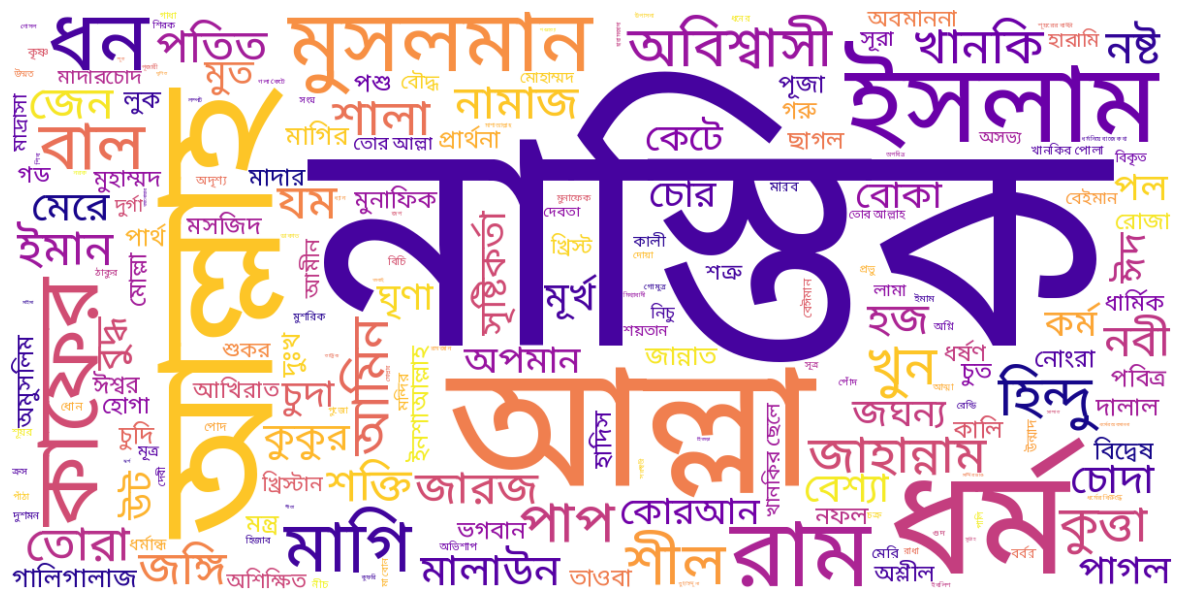

Top 20 Keywords:
নাস্তিক: 12152
আল্লা: 1725
আল্লাহ: 1656
ধর্ম: 1286
ইসলাম: 632
রাম: 450
কাফের: 378
মুসলমান: 367
ধন: 353
মাগি: 239
বাল: 213
শীল: 166
পাপ: 152
হিন্দু: 150
অবিশ্বাসী: 150
খুন: 142
আমিন: 134
জাহান্নাম: 127
শালা: 124
খানকি: 121


In [24]:
# 📦 Install required packages
!pip install wordcloud matplotlib pandas --quiet

# 🔽 Download Noto Sans Bengali zip from Google storage
!wget -q https://noto-website-2.storage.googleapis.com/pkgs/NotoSansBengali-unhinted.zip -O noto_bengali.zip

# 📤 Unzip the fonts
!unzip -o noto_bengali.zip -d noto_fonts

import os, zipfile
from google.colab import drive
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 📁 Mount Drive if needed (uncomment if using Google Drive)
# drive.mount('/content/drive')

# 🚨 Ensure the regular font is present
font_path = "noto_fonts/NotoSansBengali-Regular.ttf"
assert os.path.exists(font_path), "❌ Font file not found!"

# 🧾 Load your CSV dataset
file_path = "/content/drive/MyDrive/Research Paper/Data Preprocessing/2 Class/Labeled_2class_Religious_Comments_Bangla_v6.csv"
df = pd.read_csv(file_path)

# ✍️ Paste your keyword lists here (only examples shown):
religious_keywords = [
    # Islamic Keywords
    'আল্লাহ', 'আহাল্লার', 'আল্লা', 'মোহাম্মদ', 'ইসলাম', 'ধর্ম', 'রোজা', 'হজ', 'কোরআন', 'নামাজ', 'মসজিদ', 'দোয়া', 'ফজর',
    'জুম্মা', 'ঈদ', 'ইমান', 'মুসলমান', 'আযান', 'ইমাম', 'মাদ্রাসা', 'সালাত', 'যাকাত', 'সাওম', 'শাহাদাহ',
    'আখিরাত', 'জান্নাত', 'জাহান্নাম', 'ফাতেহা', 'সূরা', 'আয়াত', 'হাদিস', 'সুন্নাহ', 'তাওহিদ', 'শিরক',
    'মিলাদ', 'বিসমিল্লাহ', 'ইনশাআল্লাহ', 'মাশাআল্লাহ', 'আস্তাগফিরুল্লাহ', 'সুবহানাল্লাহ', 'আমিন',
    'রমজান', 'কিবলা', 'তাকবীর', 'তাহাজ্জুদ', 'ওযু', 'গোসল', 'খতম', 'দরুদ', 'কিয়ামত', 'মিকাত',
    'মুআজ্জিন', 'নফল', 'কাফের', 'মুনাফিক', 'তাওবা', 'জিজিয়া', 'খুতবা', 'ইকামত', "নাস্তিক",
    'নবী', 'নোবী', 'নোবীর', 'মোল্লা', 'মোল্লার', 'মহাম্মদ', 'মুহাম্মদ', 'মাদ্রসা', 'মাদরাসা', 'ইজরাইল',
    "জিবরাইল", "জিব্রাইল", "আজরাইল", "মিকাইল", "ইসরাফিল",
    "মুহাম্মদ", "ইব্রাহিম", "মূসা", "ঈসা", "নুহ", "ইউনুস",
    "দাউদ", "সুলাইমান", "আইউব", "হারুন", "ইলিয়াস", "লুত",
    "উম্মাহ", "উম্মত", "হিজাব", "বুরকা", "তসবিহ", 'আমীন',

    # Hindu Keywords
    'হিন্দু', 'রাম', 'শিব', 'কৃষ্ণ', 'পূজা', 'উপাসনা', 'গীতা', 'ভগবান', 'তীর্থ', 'আত্মা', 'দুর্গা',
    'কালী', 'লক্ষ্মী', 'সরস্বতী', 'হনুমান', 'গণেশ', 'যজ্ঞ', 'মন্ত্র', 'প্রার্থনা', 'অর্চনা', 'দেবতা',
    'অসুর', 'ব্রহ্মা', 'বিষ্ণু', 'মহাদেব', 'অভিষেক', 'পূজারী', 'প্রসাদ', 'মন্দির', 'জপ', 'অগ্নি',
    'অহিংসা', 'অবতার', 'আরতি', 'ঐশ্বর্য', 'কৈলাশ', 'চণ্ডী', 'জয়ন্তী', 'তিলক', 'দীক্ষা', 'ধুনুচি',
    'নবরাত্রি', 'পঞ্চদেবতা', 'ব্রত', 'মহিষাসুর', 'যোগিনী', 'শক্তি', 'মালায়ুন', 'মালায়ন', 'ঠাকুর',
    "ব্রহ্মা", "বিষ্ণু", "মহেশ", "ইন্দ্র", "অগ্নি", "বরুণ",
    "কুবের", "যম", "হনুমান", "রাম", "লক্ষ্মণ", "কৃষ্ণ", "বালরাম",
    "ভগবান", "ভগবতী", "দুর্গা", "কালি", "সরস্বতী", "লক্ষ্মী", "পার্থ",
    "সীতা", "রাধা", "শক্তি", "গণেশ", "কার্তিক", "নারায়ণ", "রামচন্দ্র",
    "ভগবান", "অবতার", "অবতারপুরুষ", "গোবিন্দ", "নন্দলাল", "নরসিংহ",
    "ত্রিলোকনাথ", "জগন্নাথ", "দেবতা", "দেবী", 'দেবি', 'পুজো',

    # Christian Keywords
    'যীশু', 'খ্রিস্টান', 'বাইবেল', 'গির্জা', 'পাদ্রি', 'ক্রুশ', 'প্রভু', 'পাপ', 'স্বর্গরাজ্য',
    'প্রেরিত', 'জন্মদিন', 'ইস্টার', 'খ্রীষ্ট', 'পবিত্র আত্মা', 'ধর্মপ্রচারক', 'যাজক', 'অনুতাপ', 'দানিয়েল',
    'দশ আজ্ঞা', 'নূহ', 'যোহন', 'প্রলয়', 'যিশাইয়', 'গসপেল', 'খ্রিস্টমাস', "ঈসা", "যিশু", "যীশু", "মেরি", "পিতাপবিত্র", "গড", "ক্রিস্ট", "খ্রিস্ট", "ম্যাথিউ",
    "লুক", "পল", "মোজেস", "ডেভিড", "সামুয়েল", "ক্রস", "বাইবেল", "ঈশ্বর",

    # Buddhist Keywords
    'বুদ্ধ', 'বৌদ্ধ', 'কর্ম', 'নির্বাণ', 'পালি', 'সূত্র', 'ভিক্ষু', 'ধ্যান', 'অষ্টাঙ্গিক মার্গ', 'দুঃখ',
    'ত্রিপিটক', 'শীল', 'প্রজ্ঞা', 'কারুণ্য', 'বোধি', 'সংঘ', 'তান্ত্রিক', 'মৈত্রী', 'চক্র', 'জেন',
    'লামা', 'মনীষা', 'শূন্যতা', 'স্তূপ', 'ধর্মচক্র', "গৌতম বুদ্ধ", "বুদ্ধ", "শাক্যমুনি", "অমিতাভ", "অভলোকিতেশ্বর", "মৈত্রেয়", "ধর্ম", "সংঘ",

    # General Spiritual/Religious
    'ঈশ্বর', 'নরক', 'স্বর্গ', 'পবিত্র', 'ধার্মিক', 'অধর্ম', 'অলৌকিক', 'অধ্যাত্ম', 'আশীর্বাদ', 'অভিশাপ',
    'মৃত্যুঞ্জয়', 'তীর্থযাত্রা', 'পুণ্য', 'অদৃশ্য', 'আত্মসমর্পণ', 'জাগরণ', 'মহিমা', 'মোল্লা', 'গো মুত্র', '৭৮৬' 'নুনু',
    'সৃষ্টিকর্তা', 'পশুহত্যা', 'জঙ্গি', 'মুনাফেক', 'সইতান', 'উট', 'মালাউন'
]
harassment_keywords = [
     # Personal attacks
    'শুয়োর', 'কুকুর', 'গাধা', 'জানোয়ার', 'পশু', 'গরু', 'ছাগল', 'পাঁঠা', 'গাধার', 'খানকি',
    'খানকির ছেলে', 'হারামি', 'হারামজাদা', 'জারজ', 'ব্যভিচারী', 'বেইমান', 'কামচোর', 'চোদা',
    'চুদা', "চুদি", 'চুদেছিল', 'চুদেছি', 'খানকির পোলা', 'ধোন', 'বাল', 'লান্ড', 'ভোঁদা', 'পোদ', 'পোঁদ', 'গুদ', 'হোগা', 'চুত', 'মাগি', 'মাগির',
    'বেশ্যা', 'রেন্ডি', 'দালাল', 'হিজড়া', 'নপুংসক', 'হিজড়া', 'কুত্তা', 'কুত্তাচোদা', 'শালা', 'ধনের', 'ধন', 'মাদারচোদ', 'বিচিকে',

    # Religious/caste slurs
    'ম্লেচ্ছ', 'যবন', 'কাফের', 'নাস্তিক', 'ধর্মহীন', 'অধার্মিক', 'অবিশ্বাসী', 'মুশরিক', 'নীচ',
    'নিচু', 'অচ্ছুত', 'চণ্ডাল', 'ডোম', 'হরিজন', 'মালাউন', 'মালুন', 'কাঙ্গাল',

    # Verbal abuse/actions
    'মারব', 'মেরে', 'খুন', 'কাটব', 'কেটে', 'জবাই', 'ধর্ষণ', 'গালিগালাজ',
    'অপমান', 'অবমাননা', 'অশ্লীল', 'নোংরা', 'ঘৃণা', 'বিদ্বেষ', 'শত্রু', 'দুশমন', 'মিথ্যাবাদী',
    'প্রবঞ্চক', 'ধোকাবাজ', 'বোকা', 'মূর্খ', 'অশিক্ষিত', 'গণ্ডমূর্খ', 'জাহিল', 'নষ্ট', 'ভণ্ড',
    'পাষণ্ড', 'পিশাচ', 'নরপিশাচ', 'অসভ্য', 'বর্বর', 'জংলী', 'পাগল', 'উন্মাদ', 'বিকৃত',
    'কুৎসিত', 'জঘন্য', 'ঘৃণিত', 'চোর', 'ডাকাত', 'লম্পট', 'বদমাশ', 'শয়তান', 'ইবলিশ', 'কুফরি',

    # Religion-specific abuse
    'অবিশ্বাসী', 'ধর্মবিদ্বেষী', 'অমুসলিম', 'ধর্মান্ধ', 'ধর্ম নিয়ে বাজে কথা', 'ধর্মীয় উগ্রতা',
    'অশ্রদ্ধা', 'জীবজন্তু', 'তোরা', 'জাহান্নামে যাবি', 'জাহান্নামে চলে যা', 'তুই মুসলমান না',
    'তুই হিন্দু না', 'ধর্ম নষ্ট', 'ধর্ম নিয়ে ঠাট্টা', 'ধর্মের শত্রু', 'ধর্ম ত্যাগী', 'নরাধম',
    'পতিত', 'অপবিত্র', 'গোমাংস খাও', 'গো-মূত্র পান কর', 'মন্দির ভাঙ', 'মসজিদ ভাঙ',
    'ধর্মের অপমান', 'ধর্মের অবমাননা', 'ধর্মের বিরুদ্ধে', 'ধর্মের অপব্যবহার',
    'ধর্ম গালি', 'ধর্মের বিরুদ্ধে কথা', 'ধর্মের মজা কর', 'ধর্ম নিয়ে বিদ্রূপ',
    'ধর্মের নামে অপপ্রচার', 'ধর্ম নিয়ে মজা', 'ধর্ম নিয়ে খেলা', 'ধর্মের শাস্তি দিব',
    'জিহাদ করব', 'ধর্মযুদ্ধ করব', 'ধর্মের নামে মারব', 'ধর্মের দোহাই দিয়ে মার',
    'মুসলমানের শত্রু', 'হিন্দুর শত্রু', 'বৌদ্ধের শত্রু', 'খ্রিস্টানের শত্রু',
    'মুসলমান নষ্ট', 'হিন্দু নষ্ট', 'বৌদ্ধ নষ্ট', 'খ্রিস্টান নষ্ট', 'জঙ্গি', 'ওইটা চুষা',
    ' বিচিতে', ' বিচি', 'বিচিতে', 'নবিচোদা', 'কেলাবার', 'তোর আল্লাহ', 'তোর আল্লা', ' শুকর',
    'বেহেনচোদ', 'বেঈমান', 'মীরজাফর', 'পশুহত্যা', 'মা বোন', 'সইতান', 'গলা কেটে',
    'বকচুদ', 'নুংকু', 'গোমূত্র', 'শালা', 'মূত্র', 'মুত', 'চাড্ডী', 'মাদার','বাঞ্ছোদ','শূয়র', 'শূয়রের বাচ্চা', 'খানকির ছেলে'
]

# 🧠 Combine lists & extract relevant comments
all_keywords = religious_keywords + harassment_keywords
comments = df[df['label'] == 'Religious Abuse']['comment']

# 🔍 Extract keywords from the comments
def extract_kw(s, kw_list):
    chk = str(s)
    return [w for w in kw_list if w in chk]

kw_list = []
for c in comments:
    kw_list.extend(extract_kw(c, all_keywords))

freq = Counter(kw_list)

# ☁️ Generate the word cloud
wc = WordCloud(
    font_path=font_path,
    width=1200,
    height=600,
    background_color='white',
    colormap='plasma',
    relative_scaling=0.5
).generate_from_frequencies(freq)

# 📊 Plot and save
plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig("/content/bengali_wordcloud.png", dpi=300, bbox_inches='tight')
plt.show()

# 🔝 Print top 20 frequencies
print("Top 20 Keywords:")
for w, c in freq.most_common(20):
    print(f"{w}: {c}")
